In [84]:
# import libraries
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
from torchvision import transforms

In [85]:
train_data = pd.read_csv("fmnist_train.csv")

df_train, df_valid = train_test_split(train_data, test_size=0.2, random_state=42, shuffle=True)

y_train = df_train.pop('label')
y_valid = df_valid.pop('label')

df_train.drop(axis=1,columns=('Id'),inplace=True)
df_valid.drop(axis=1,columns=('Id'),inplace=True)

df_train.fillna(0,inplace=True)
df_valid.fillna(0,inplace=True)


In [86]:
x_train = df_train.to_numpy()
x_train = x_train.astype('float32')
x_train = np.reshape(x_train, (len(x_train),28,28))
y_train = y_train.to_numpy()
y_train = y_train.astype('float32')

x_valid = df_valid.to_numpy()
x_valid = x_valid.astype('float32')
x_valid = np.reshape(x_valid, (len(x_valid),28,28))
y_valid = y_valid.to_numpy()
y_valid = y_valid.astype('float32')

y_train_rgb = np.asarray(y_train).astype('float32').reshape((-1,1))
y_valid_rgb = np.asarray(y_valid).astype('float32').reshape((-1,1))

In [87]:
x_valid_rgb = np.empty((3408,28,28,3))
for i,image in enumerate(x_valid):
  image_rgb = np.stack((image,image,image),axis=2)
  x_valid_rgb[i] = image_rgb

x_train_rgb = np.empty((13632,28,28,3))
for i,image in enumerate(x_train):
  image_rgb = np.stack((image,image,image),axis=2)
  x_train_rgb[i] = image_rgb

In [88]:
#tf.convert_to_tensor(train_data)
ds_train = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32)
ds_valid = tf.data.Dataset.from_tensor_slices((x_valid,y_valid)).batch(32)
IMAGE_SIZE = (28, 28)
BATCH_SIZE = 32
ds_train_rgb = tf.data.Dataset.from_tensor_slices((x_train_rgb,y_train_rgb)).batch(32)
ds_valid_rgb = tf.data.Dataset.from_tensor_slices((x_valid_rgb,y_valid_rgb)).batch(32)

In [89]:
# Буферизируем ввод.
ds_train = ds_train.prefetch(buffer_size=32)
ds_valid = ds_valid.prefetch(buffer_size=32)

ds_train_rgb = ds_train_rgb.prefetch(buffer_size=32)
ds_valid_rgb = ds_valid_rgb.prefetch(buffer_size=32)


In [90]:
# Генерируем обучающую и валидационной выборки.
VALIDATION_SPLIT = 0.2
SEED = 1337
IMAGE_SIZE = (28, 28)
BATCH_SIZE = 32


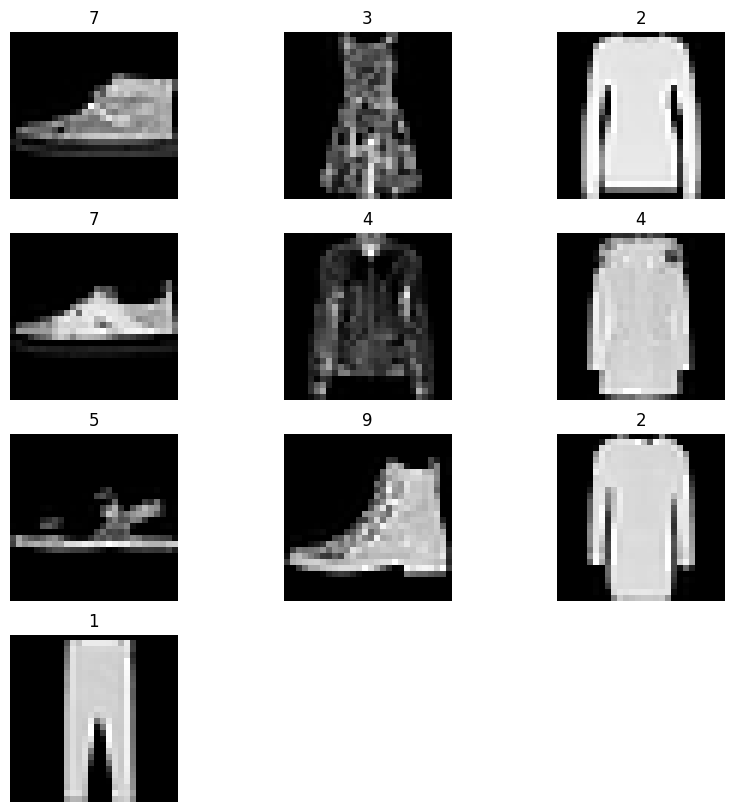

In [91]:
# Посмотрим на изображения.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_train_rgb.take(1):
    for i in range(10):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [92]:
# Сделаем вспомогательную структуру для наращивания обучающей выборки.
augmentation_network = tf.keras.Sequential(
    [
        # Тоже слои, но реализуют детерминированные алгоритмы.
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

In [93]:
# Нарастим обучающую выборку.
augmented_training_images = ds_train_rgb.map(
  lambda image, label: (augmentation_network(image, training = True), label)
)

In [94]:
# Буферизируем ввод.
augmented_training_images = augmented_training_images.prefetch(buffer_size=32)
validation_images = ds_valid_rgb.prefetch(buffer_size=32)

In [95]:
!pip install keract
!pip install tensorflow
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras import activations
from keract import get_activations, display_activations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
model = Sequential()
model.add(Conv2D(2, kernel_size=(5, 5), activation='relu', input_shape=(28,28,1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', padding="same"))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    batch_size=BATCH_SIZE,
    epochs=20
)

Epoch 1/20
426/426 [==============================] - 12s 27ms/step - loss: 0.8218 - sparse_categorical_accuracy: 0.7681
Epoch 2/20
426/426 [==============================] - 10s 23ms/step - loss: 0.3935 - sparse_categorical_accuracy: 0.8560
Epoch 3/20
426/426 [==============================] - 11s 27ms/step - loss: 0.2889 - sparse_categorical_accuracy: 0.8977
Epoch 4/20
426/426 [==============================] - 11s 26ms/step - loss: 0.2192 - sparse_categorical_accuracy: 0.9222
Epoch 5/20
426/426 [==============================] - 11s 27ms/step - loss: 0.1742 - sparse_categorical_accuracy: 0.9376
Epoch 6/20
426/426 [==============================] - 11s 26ms/step - loss: 0.1468 - sparse_categorical_accuracy: 0.9478
Epoch 7/20
426/426 [==============================] - 11s 27ms/step - loss: 0.1442 - sparse_categorical_accuracy: 0.9478
Epoch 8/20
426/426 [==============================] - 11s 27ms/step - loss: 0.1406 - sparse_categorical_accuracy: 0.9483
Epoch 9/20
426/426 [============

In [75]:
# Метод для создания модели Xception network.
model = tf.keras.models.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255),
  #tf.keras.layers.Conv2D(32, 3, strides=2, padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])


model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=50,
    validation_data=ds_valid,
)

Epoch 1/50


ValueError: ignored

In [110]:
#make prediction ds
df_predict = pd.read_csv('fmnist_test.csv')
df_predict.drop(axis=1,columns=('Id'),inplace=True)
df_predict.fillna(0,inplace=True)
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 59.8 MB


In [111]:
x_predict = df_predict.to_numpy()
x_predict = x_predict.astype('float32')
x_predict = np.reshape(x_predict, (len(x_predict),28,28))

In [112]:
predictions = model.predict(x_predict)

313/313 [==============================] - 6s 19ms/step


In [113]:
res_list = []
for predict in predictions:
  res_list.append(np.argmax(predict))

In [114]:
df_result = pd.DataFrame(res_list,columns=['Category'])
df_result
print(df_result)
df_result.to_csv('result_IvanovKA4.csv',index_label='Id')

      Category
0            0
1            1
2            2
3            2
4            4
...        ...
9995         0
9996         6
9997         8
9998         8
9999         4

[10000 rows x 1 columns]


In [56]:
df1 = pd.read_csv('result_IvanovKA2.csv')
df1

,Id,Category
0,0,0
1,1,1
2,2,2
3,3,2
4,4,4
...,...,...
9995,9995,0
9996,9996,6
9997,9997,8
9998,9998,8
